In [49]:
'''>>>>> start CodeP3.2.1F24
    V.P. Carey ME249, Fall 2024 

Intro to Neural Network Modeling 
Keras model for PV power system'''

#import useful packages
import keras
import math
import pandas as pd
from copy import deepcopy
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.models import Sequential
import numpy as np
import keras.backend as kb
import tensorflow as tf
import matplotlib.pyplot as plt
#the following 2 lines are only needed for Mac OS machines
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#Part 1 input data: Mode number, Air temp (degC), ID (W/sqm), load resistance (ohms)
xdata = [[0., 10.0, 200.0, 24.3],
        [1., 10.0, 200.0, 24.3],
        [2., 10.0, 200.0, 24.3],
        [1., 10.0, 200.0, 24.3],
        [0., 10.0, 200.0, 24.3], 
        [1., 10.0, 200.0, 24.3], 
        [2., 10.0, 200.0, 24.3], 
        [0., 10.0, 200.0, 51.8], 
        [1., 10.0, 200.0, 51.8],
                
        [2., 10.0, 200.0, 51.8], 
        [0., 10.0, 200.0, 96.2], 
        [1., 10.0, 200.0, 96.2], 
        [2., 10.0, 200.0, 96.1], 
        [0., 10.0, 200.0, 170.1],
                
        [1., 10.0, 200.0, 170.1], 
        [2., 10.0, 200.0, 170.1], 
        [0., 10.0, 500.0, 7.0], 
        [1., 10.0, 500.0, 7.0], 
        [2., 10.0, 500.0, 7.0], 
                
        [0., 10.0, 500.0, 21.2], 
        [1., 10.0, 500.0, 21.2], 
        [2., 10.0, 500.0, 21.2], 
        [0., 10.0, 500.0, 43.2], 
        [1., 10.0, 500.0, 43.2], 
                
        [1., 10.0, 700.0, 4.9], 
        [2., 10.0, 700.0, 4.9], 
        [0., 10.0, 700.0, 14.3], 
        [1., 10.0, 700.0, 14.3], 
        [2., 10.0, 700.0, 14.3],
                
        [2., 10.0, 500.0, 43.2], 
        [0., 10.0, 500.0, 79.1], 
        [1., 10.0, 500.0, 79.1], 
        [2., 10.0, 500.0, 79.1], 
        [0., 10.0, 700.0, 4.8], 
                
        [0., 10.0, 700.0, 29.7], 
        [1., 10.0, 700.0, 29.7], 
        [2., 10.0, 700.0, 29.7], 
        [0., 10.0, 700.0, 55.3], 
        [1., 10.0, 700.0, 55.3], 
        [2., 10.0, 700.0, 55.3], 
                
        [0., 10.0, 1000.0, 3.92], 
        [1., 10.0, 1000.0, 3.92], 
        [2., 10.0, 1000.0, 3.92], 
        [0., 10.0, 1000.0, 11.7], 
        [1., 10.0, 1000.0, 11.7], 
                
        [2., 10.0, 1000.0, 11.7], 
        [0., 10.0, 1000.0, 25.2], 
        [1., 10.0, 1000.0, 25.2], 
        [2., 10.0, 1000.0, 25.2], 
        [0., 10.0, 1000.0, 41.6], 
        [1., 10.0, 1000.0, 41.6], 
        [2., 10.0, 1000.0, 41.6]]

xarray= np.array(xdata)
# print (xdata)
# print (xarray)

# define meadian values of input variables - add your values here
Tamed = np.median(xarray[:,1])  #make sure Tamed does not = 0
IDmed = np.median(xarray[:,2])
RLmed = np.median(xarray[:,3])
print(f"Tamed = {Tamed}, IDmed = {IDmed}, RLmed = {RLmed}")

if Tamed==0:
    raise ValueError(f'Tamed == {Tamed}')

#Part 1 output data: VL (V) and Power out Wd (W)
ydata = [[46.0, 87.3],
         [27.9, 64.2],
         [27.9, 32.1],
         [46.0, 40.9],
         [46.0, 87.3], 
         [27.9, 64.2], 
         [27.9, 32.1], 
         [46.0, 40.9], 
         [92.1, 163.9], 
         [59.5, 68.5], 
         [46.0, 22.0], 
         [92.1, 88.2], 
         [110.6, 127.2], 
         [46.0, 12.4], 
         [92.1, 49.9], 
         [184.2, 199.6], 
         [48.4, 335.3], 
         [20.8, 124.3], 
         [20.8, 62.1], 
         [48.4, 110.7], 
         [96.8, 442.9], 
         [63.1, 188.2], 
         [48.4, 54.3], 
         [96.9, 217.3], 
         [128.7, 383.6], 
         [48.4, 29.6], 
         [96.8, 118.7], 
         [193.7, 474.8], 
         [49.3, 496.1], 
         [20.4, 171.2], 
         [20.4, 85.6], 
         [49.3, 169.9], 
         [98.6, 679.9], 
         [59.7, 249.8], 
         [49.3, 81.8], 
         [98.6, 327.4], 
         [124.1, 518.9], 
         [49.305, 43.9], 
         [98.6, 175.8], 
         [197.2, 703.3], 
         [50.8, 658.9], 
         [23.1, 272.9], 
         [23.1, 136.4], 
         [50.8, 220.7], 
         [101.6, 883.1], 
         [69.0, 407.2], 
         [50.8, 102.5], 
         [101.6, 410.0], 
         [148.6, 877.2], 
         [50.8, 62.0], 
         [101.6, 248.3], 
         [203.2, 993.5]]

yarray= np.array(ydata)
# print (ydata)
# print (yarray)

# define meadian values of output variables - add your values here
VLmed = np.median(yarray[:,0])
Wdmed = np.median(yarray[:,1])
print(f"VLmed = {VLmed}, Wdmed = {Wdmed}")

Tamed = 10.0, IDmed = 500.0, RLmed = 25.2
VLmed = 50.8, Wdmed = 150.15


In [50]:
### normalize the dataset
xnorm = deepcopy(xarray)
xnorm[:,1] = xarray[:,1] / Tamed
xnorm[:,2] = xarray[:,2] / IDmed
xnorm[:,3] = xarray[:,3] / RLmed
# print(xnorm)

ynorm = deepcopy(yarray)
ynorm[:,0] = yarray[:,0] / VLmed
ynorm[:,1] = yarray[:,1] / Wdmed
# print(ynorm)

In [51]:
### separate normalized sets into train/(test or validation) 66:33
xtrain, xtest, ytrain, ytest = train_test_split(xnorm, ynorm, test_size=0.33, random_state=1) # change random seed if you want

# sanity check
# print(len(xtrain), len(ytrain))
# print(len(xtest), len(ytest))

In [52]:
# define neural network model

#As seen below, we have created four dense layers. 
#A dense layer is a layer in neural network that’s fully connected. 
#In other words, all the neurons in one layer are connected to all other neurons in the next layer.
#In the first layer, we need to provide the input shape, which is 4 in our case. 
#The activation function we have chosen is elu, which stands for exponential linear unit. .

from keras import backend as K
#initialize weights with values between -0.2 and 0.5
initializer = keras.initializers.RandomUniform(minval= -0.2, maxval=0.5)

model = keras.Sequential([
    keras.layers.Dense(16, activation=K.elu, input_shape=[4], kernel_initializer=initializer),
    keras.layers.Dense(64, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(8, activation=K.elu, kernel_initializer=initializer),
    keras.layers.Dense(2, kernel_initializer=initializer)
  ])


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [53]:
#We’re using RMSprop as our optimizer here. RMSprop stands for Root Mean Square Propagation. 
#It’s one of the most popular gradient descent optimization algorithms for deep learning networks. 
#RMSprop is an optimizer that’s reliable and fast.
#We’re compiling the mode using the model.compile function. The loss function used here 
#is mean squared error. After the compilation of the model, we’ll use the fit method with ~500 epochs.
#Number of epochs can be varied.

#from tf.keras import optimizers
rms = keras.optimizers.RMSprop(0.020)
model.compile(loss='MAE',optimizer=rms)
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 16)                80        
                                                                 
 dense_28 (Dense)            (None, 64)                1088      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 8)                 264       
                                                                 
 dense_31 (Dense)            (None, 2)                 18        
                                                                 
Total params: 3,530
Trainable params: 3,530
Non-traina

In [66]:
#After the compilation of the model, we’ll use the fit method with 500 epochs.
#I started with epochs value of 100 and then tested the model after training. 
#The prediction was not that good. Then I modified the number of epochs to 200 and tested the model again. 
#Accuracy had improved slightly, but figured I’d give it one more try. Finally, at 500 epochs 
#I found acceptable prediction accuracy.

#The fit method takes three parameters; namely, x, y, and number of epochs. 
#During model training, if all the batches of data are seen by the model once, 
#we say that one epoch has been completed.

# Add an early stopping callback
es = keras.callbacks.EarlyStopping(
    monitor='loss', 
    mode='min', 
    patience = 80, 
    restore_best_weights = True, 
    verbose=1)
# Add a checkpoint where loss is minimum, and save that model
mc = keras.callbacks.ModelCheckpoint('best_model.SB', monitor='loss', 
                                    mode='min',  verbose=1, save_best_only=True)

historyData = model.fit(xnorm,ynorm,epochs=800,callbacks=[es])

loss_hist = historyData.history['loss']
#The above line will return a dictionary, access it's info like this:
best_epoch = np.argmin(historyData.history['loss']) + 1
print ('best epoch = ', best_epoch)
print('smallest loss =', np.min(loss_hist))

model.save('./best_model_1')

Epoch 1/800
2/2 [==============================] - 0s 3ms/step - loss: 0.2090
Epoch 2/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2517
Epoch 3/800
2/2 [==============================] - 0s 1ms/step - loss: 0.2970
Epoch 4/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2582
Epoch 5/800
2/2 [==============================] - 0s 4ms/step - loss: 0.2895
Epoch 6/800
2/2 [==============================] - 0s 1ms/step - loss: 0.2351
Epoch 7/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2831
Epoch 8/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2888
Epoch 9/800
2/2 [==============================] - 0s 1ms/step - loss: 0.2193
Epoch 10/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2854
Epoch 11/800
2/2 [==============================] - 0s 2ms/step - loss: 0.2828
Epoch 12/800
2/2 [==============================] - 0s 1ms/step - loss: 0.3381
Epoch 13/800
2/2 [==============================] - 0s 2ms/st

2024-11-18 22:13:45.951818: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]
2024-11-18 22:13:46.035268: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: ./best_model_1/assets


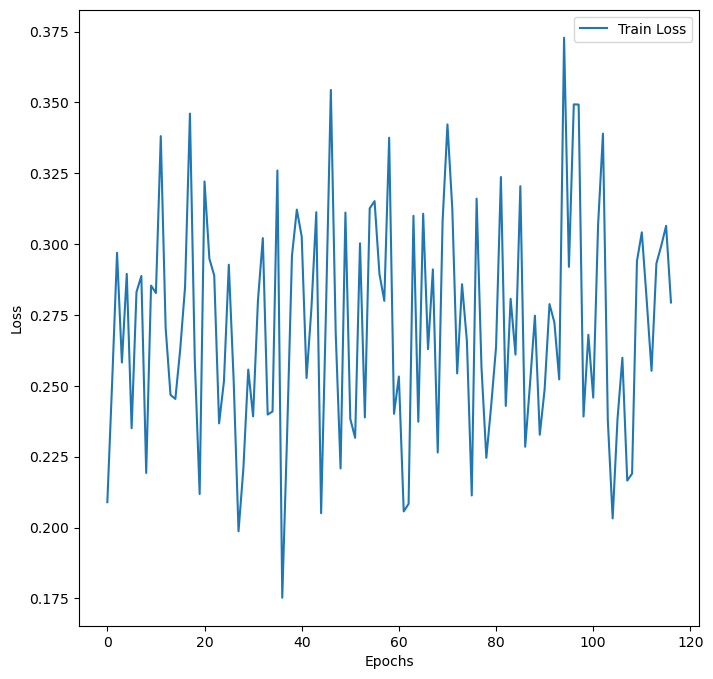

In [67]:
plt.plot(historyData.history['loss'], label='Train Loss')
# plt.plot(historyData.history['val_loss'], label='Validation Loss')
# plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [68]:
# This line of code can be used to reconstruct the saved model.

recon_model = keras.models.load_model("best_model_1")

# the name of the model is now "recon_model". You can then use this model to do predictions for comparisons.
# See the previous project for code to do the comparisons.


/opt/miniconda3/envs/3.10test/lib/python3.10/site-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [75]:
predictions = recon_model.predict(xtrain)
predictions_val = recon_model.predict(xtest)

pv, pw = [], []
rv, rw = [], []

pv_val, pw_val = [], []
rv_val, rw_val = [], []

abs_err = 0
for pred, real in zip(predictions, ytrain):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err += abs(real_w - pred_w)
    pv.append(pred_v)
    pw.append(pred_w)
    rv.append(real_v)
    rw.append(real_w)

abs_err_val = 0
for pred, real in zip(predictions_val, ytest):
    pred_v, pred_w = pred
    real_v, real_w = real
    abs_err_val += abs(real_w - pred_w)
    pv_val.append(pred_v)
    pw_val.append(pred_w)
    rv_val.append(real_v)
    rw_val.append(real_w)

mean_abs_err = abs_err/len(pw)
mean_abs_err_val = abs_err_val/len(pw_val)
print("mean absolute error (training): ", mean_abs_err)
print("mean absolute error (validation): ", mean_abs_err_val)

1/1 [==============================] - 0s 11ms/step
mean absolute error (training):  0.25747875576539914
mean absolute error (validation):  0.29152607337772274


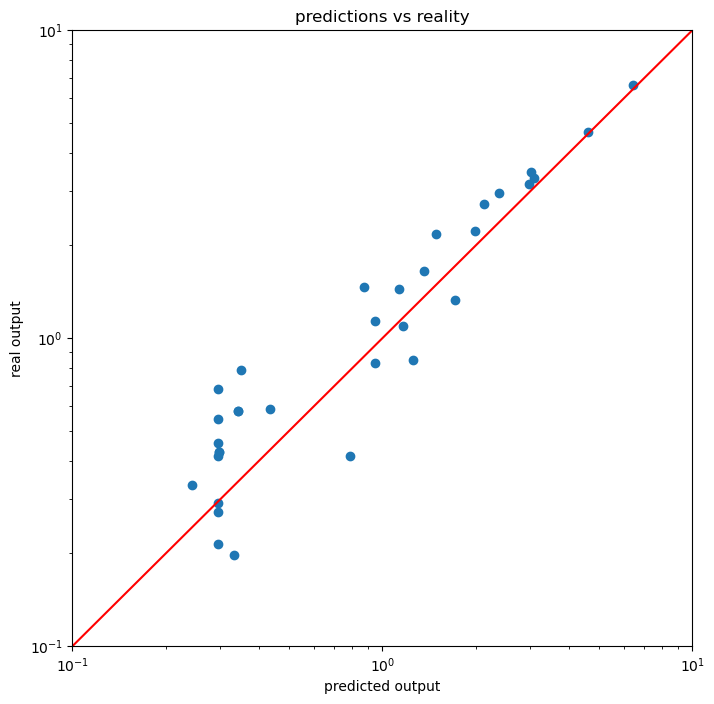

In [76]:
# training
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw, rw)
# plt.scatter(pv, rv)
plt.title('predictions vs reality')
plt.xlabel('predicted output') 
plt.ylabel('real output')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()

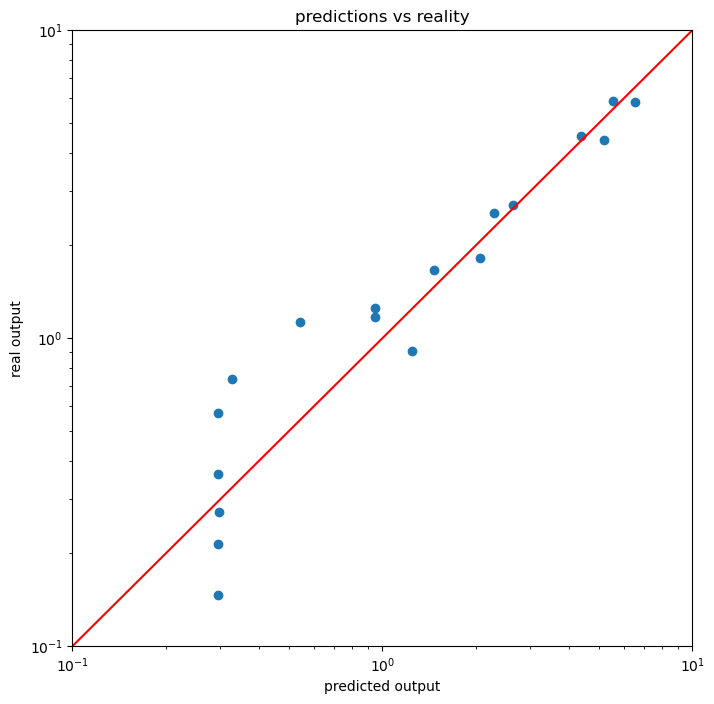

In [77]:
# validation
plt.rcParams['figure.figsize'] = [8, 8] # for square canvas

plt.scatter(pw_val, rw_val)
# plt.scatter(pv, rv)
plt.title('predictions vs reality')
plt.xlabel('predicted output') 
plt.ylabel('real output')
plt.loglog()
plt.xlim(xmax = 10, xmin = 0.1)
plt.ylim(ymax = 10, ymin = 0.1)
# Generate red y=x line
x_data = np.linspace(0.1, 10.0, num=3)
y_data = x_data
plt.plot(x_data, y_data, color='red')
plt.show()